In [6]:
import pandas as pd
import sqlite3
import re

# Connect to DB
conn = sqlite3.connect("./acct/database2.db")

In [2]:
# Head table
df = pd.read_sql_query("select * from form4Head;", conn)
df
df2 = df.copy()
df2.columns

Index(['accNum', 'headId', 'rowNumber', 'documentType', 'publicDocCount',
       'periodOfReport', 'filedDate', 'changedDate', 'schemaVersion',
       'dateOfOriginalSubmission', 'notSubjectToSection16', 'issuerName',
       'issuerCik', 'issuerIndustrialClassification', 'issuerIrs',
       'issuerIncorpState', 'issuerFiscalYrEnd', 'issuerBusinessStreet1',
       'issuerBusinessCity', 'issuerBusinessState', 'issuerBusinessZip',
       'issuerBusinessPhone', 'issuerMailStreet1', 'issuerMailStreet2',
       'issuerMailCity', 'issuerMailState', 'issuerMailZip',
       'issuerTradingSymbol', 'rptOwnerName', 'rptOwnerCik',
       'rptOwnerFormType', 'rptOwnerSecAct', 'rptOwnerSecFileNum',
       'rptOwnerFilmNum', 'rptOwnerBusinessPhone', 'rptOwnerStreet1',
       'rptOwnerStreet2', 'rptOwnerCity', 'rptOwnerState', 'rptOwnerZipCode',
       'rptOwnerStateDescription', 'rptOwnerMailStreet1',
       'rptOwnerMailStreet2', 'rptOwnerMailCity', 'rptOwnerMailState',
       'rptOwnerMailZip', 'rpt

count    4567.000000
mean        2.306328
std         2.914328
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        54.000000
dtype: float64
rptOwnerName
ADVENT INTERNATIONAL CORP/MA         54
ACCESS INDUSTRIES MANAGEMENT, LLC    30
AI Altep Holdings, Inc               30
RSB 2 Ltd                            30
AI New Holdings 2 LLC                30
dtype: int64


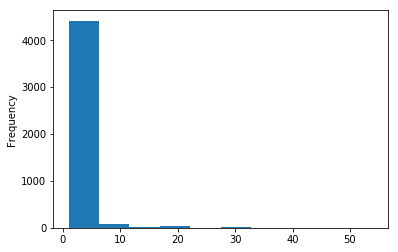

In [10]:
# number of files by same rptOwner is left skewed
# prob can just match base on rptOwner
grouped = df2.groupby(['rptOwnerName'])
sizes = grouped.size()
sizes.plot('hist', label=True)

# print stats of grouped
print(sizes.describe())

# print top rptOwner sorted by #files
print(sizes.sort_values(ascending=False).head(5))

count    8401.000000
mean        1.253779
std         1.236592
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        10.000000
dtype: float64
accNum
1034196/0001209191-17-013596    10
1432552/0001209191-17-022496    10
1430922/0001209191-17-022496    10
1430923/0001209191-17-013596    10
1432552/0001209191-17-013596    10
dtype: int64


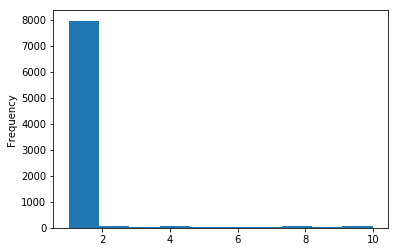

In [11]:
# number of owners in one file is left skewed
uniqueAcc = df2.groupby(['accNum'])
sizes = uniqueAcc.size()
sizes.plot('hist', label=True)

print(sizes.describe())

# max number of reporting owner for 1 file = 10
print(sizes.sort_values(ascending=False).head(5))

In [5]:
# print("Total number of rows in form4Head", df2.shape[0])

aggreg_func = {}
for col in list(df2.columns):
    aggreg_func[col] = 'first'
grouped = df2.groupby(df['accNum']).aggregate(aggreg_func)
print("Total number of unique files in form4Head", grouped.shape[0])
print("Total number of unique 4 in form4Head", grouped[grouped['documentType'] == '4'].shape[0])
print("Total number of unique 4/A in form4Head", grouped[grouped['documentType'] == '4/A'].shape[0])

Total number of rows in form4Head 10533
Total number of unique files in form4Head 8401
Total number of unique 4 in form4Head 8000
Total number of unique 4/A in form4Head 401


In [56]:
len(df2[(df2['rptOwnerName'] == 'ABG Management Ltd') & (df2['documentType'] == '4/A')])

8

In [40]:
# some companies to look into
a= df2[df2['documentType'] == '4/A'].groupby(df2['rptOwnerName']).size()
print(a.sort_values(ascending=False))

rptOwnerName
ABG Management Ltd                                         8
Ally Bridge LB Management Ltd                              8
Yu Fan                                                     8
Ally Bridge Group Capital Partners II, L.P.                8
Li Bin                                                     8
Ally Bridge Group Innovation Capital Partners III, L.P.    8
ABG II-SO Ltd                                              8
ABG Innovation-SO Ltd                                      8
Ally Bridge LB Healthcare Master Fund Ltd                  8
ABG SRNE Ltd                                               8
Revers Daniel R                                            6
Accettella Christopher                                     6
10X Capital Management, LLC                                6
Magnolia Infrastructure Partners, LLC                      6
AMID GP Holdings, LLC                                      6
American Midstream GP, LLC                                 6
ArcLight Ca

'2834'

count    282.000000
mean      34.514184
std       79.725071
min        1.000000
25%        3.000000
50%       11.000000
75%       32.000000
max      845.000000
dtype: float64
issuerIndustrialClassification
PHARMACEUTICAL PREPARATIONS [2834]        845
SERVICES-BUSINESS SERVICES, NEC [7389]    519
SERVICES-PREPACKAGED SOFTWARE [7372]      421
REAL ESTATE INVESTMENT TRUSTS [6798]      361
INDUSTRIAL ORGANIC CHEMICALS [2860]       345
dtype: int64


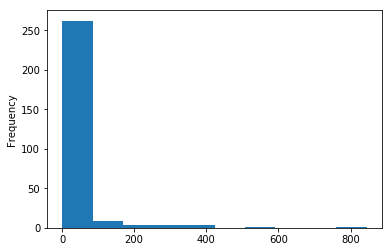

In [16]:
# standard industry classification
grouped = df2.groupby(['issuerIndustrialClassification'])
sizes = grouped.size()
sizes.plot('hist', label=True)

# print stats of grouped
print(sizes.describe())

# print top issuerIndustrialClassification sorted by #files
print(sizes.sort_values(ascending=False).head(5))

In [52]:
# sic helper funcs

def getSIC(s):
    if s == None:
        return "0000"
    return s[s.find("[")+1:s.find("]")]

# group SIC by 1st 2 digits
def groupMajorGroup(s):
    sic = getSIC(s)
    return sic[:2]
# group by 1st 3 digits
def groupIndustry(s):
    sic = getSIC(s)
    return sic[:3]

def getIndustry(s):
    sic = getSIC(s)
    if s == "0000":
        return "N/A"
    if int(sic) >= 100 and int(sic) < 1000:
        return "agriculture"
    elif int(sic) >= 1000 and int(sic) < 1500:
        return "mining"
    elif int(sic) >= 1500 and int(sic) < 1800:
        return "construction"
    elif (int(sic) >= 1800 and int(sic) < 2000) or int(sic) > 9900:
        return "N/A"
    elif int(sic) >= 2000 and int(sic) < 4000:
        return "manufacturing"
    elif int(sic) >= 4000 and int(sic) < 5000:
        return "transportation"
    elif int(sic) >= 5000 and int(sic) < 5200:
        return "wholesale"
    elif int(sic) >= 5200 and int(sic) < 6000:
        return "retail"
    elif int(sic) >= 6000 and int(sic) < 6800:
        return "finance"
    elif int(sic) >= 7000 and int(sic) < 9000:
        return "service"
    elif int(sic) >= 9100 and int(sic) < 9730:
        return "public"

In [43]:
# all form sic analysis

industries = df2.groupby(df2['issuerIndustrialClassification'].apply(getIndustry))
industries
sizes = industries.size()
print("Distribution of industries for all forms")
print(sizes.sort_values(ascending=False))
print('\n')
ind4 = df2[df2['documentType'] == '4'].groupby(df2['issuerIndustrialClassification'].apply(getIndustry))
sizes = ind4.size()
print("Distribution of industries for Form 4")
print(sizes.sort_values(ascending=False))
print('\n')
ind4A = df2[df2['documentType'] == '4/A'].groupby(df2['issuerIndustrialClassification'].apply(getIndustry))
sizes = ind4A.size()
print("Distribution of industries for Form 4/A")
print(sizes.sort_values(ascending=False))
print('\n')

Distribution of industries for all forms
issuerIndustrialClassification
manufacturing     3599
service           2167
finance           1813
transportation     991
wholesale          407
retail             349
mining             292
construction        75
agriculture         31
dtype: int64


Distribution of industries for Form 4
issuerIndustrialClassification
manufacturing     3469
service           2048
finance           1762
transportation     968
wholesale          398
retail             344
mining             284
construction        73
agriculture         31
dtype: int64


Distribution of industries for Form 4/A
issuerIndustrialClassification
manufacturing     130
service           119
finance            51
transportation     23
wholesale           9
mining              8
retail              5
construction        2
dtype: int64




In [36]:
# form 4/a sic analysis

a= df2[df2['documentType'] == '4/A'].groupby(df2['issuerIndustrialClassification'].apply(groupMajorGroup)).size()
print('4/a grouped by major group')
print(a.sort_values(ascending=False).head(10))

a2= df2[df2['documentType'] == '4/A'].groupby(df2['issuerIndustrialClassification'].apply(groupIndustry)).size()
print('4/a grouped by industry')
print(a2.sort_values(ascending=False).head(10))

4/a grouped by major group
issuerIndustrialClassification
00    212
87     85
28     48
38     43
73     28
63     16
49     16
60     12
35     11
67     10
dtype: int64
4/a grouped by industry
issuerIndustrialClassification
000    212
873     80
283     43
384     40
737     20
602     10
492      9
367      7
650      6
356      6
dtype: int64


In [38]:
# form 4 sic analysis

a= df2[df2['documentType'] == '4'].groupby(df2['issuerIndustrialClassification'].apply(groupMajorGroup)).size()
print('Form 4 grouped by major group')
print(a.sort_values(ascending=False).head(10))

a2= df2[df2['documentType'] == '4'].groupby(df2['issuerIndustrialClassification'].apply(groupIndustry)).size()
print('Form 4 grouped by industry')
print(a2.sort_values(ascending=False).head(10))

Form 4 grouped by major group
issuerIndustrialClassification
28    1520
73    1509
00     597
49     543
36     503
60     485
63     477
67     406
38     319
35     315
dtype: int64
Form 4 grouped by industry
issuerIndustrialClassification
283    1053
000     597
737     594
738     576
602     396
679     378
367     349
286     342
633     300
492     197
dtype: int64


In [72]:
# all form month info
# group by month
def groupMonth(s):
    return s[4:6]
# group by quarter
def groupQuarter(s):
    month = int(s[4:6])
    if month >= 1 and month <= 3:
        return "Q1"
    if month >= 4 and month <= 6:
        return "Q2"
    if month >= 7 and month <= 9:
        return "Q3"
    if month >= 10 and month <= 12:
        return "Q4"
    
a= df2.groupby(df2["filedDate"].apply(groupMonth)).size()
print('All forms by month')
print(a.sort_values(ascending=False))
print('\n')
a= df2.groupby(df2["filedDate"].apply(groupQuarter)).size()
print('All forms by quarter')
print(a.sort_values(ascending=False))
print('\n')

a= df2[df2['documentType'] == '4'].groupby(df2["filedDate"].apply(groupMonth)).size()
print('Form 4 by month')
print(a.sort_values(ascending=False))
print('\n')
a= df2[df2['documentType'] == '4'].groupby(df2["filedDate"].apply(groupQuarter)).size()
print('Form 4 by quarter')
print(a.sort_values(ascending=False))
print('\n')

a= df2[df2['documentType'] == '4/A'].groupby(df2["filedDate"].apply(groupMonth)).size()
print('Form 4/A by month')
print(a.sort_values(ascending=False))
print('\n')
a= df2[df2['documentType'] == '4/A'].groupby(df2["filedDate"].apply(groupQuarter)).size()
print('Form 4/A by quarter')
print(a.sort_values(ascending=False))
print('\n')

All forms by month
filedDate
03    3784
02    3687
01    2651
04     130
08      78
06      47
12      39
05      34
09      32
07      21
11      20
10      10
dtype: int64


All forms by quarter
filedDate
Q1    10122
Q2      211
Q3      131
Q4       69
dtype: int64


Form 4 by month
filedDate
03    3734
02    3622
01    2618
dtype: int64


Form 4 by quarter
filedDate
Q1    9974
dtype: int64


Form 4/A by month
filedDate
04    130
08     78
02     65
03     50
06     47
12     39
05     34
01     33
09     32
07     21
11     20
10     10
dtype: int64


Form 4/A by quarter
filedDate
Q2    211
Q1    148
Q3    131
Q4     69
dtype: int64




In [6]:
### Load dataframes
dfDT = pd.read_sql_query("select * from form4DT;", conn)
# dfDT.head()
dfNDT = pd.read_sql_query("select * from form4NDT;", conn)

In [68]:
print('Total number of derivative transaction/holdings', dfDT.shape[0])
print('Total number of derivative transaction/holdings in form 4', dfDT[dfDT['documentType'] == '4'].shape[0])
print('Total number of derivative transaction/holdings in form 4/A', dfDT[dfDT['documentType'] == '4/A'].shape[0])
print('\n')

print('Total number of derivative transactions', dfDT[dfDT['type'] == 'transaction'].shape[0])
print('Total number of derivative transactions in form 4', dfDT[(dfDT['type'] == 'transaction') & (dfDT['documentType'] == '4')].shape[0])
print('Total number of derivative transactions in form 4/A', dfDT[(dfDT['type'] == 'transaction') & (dfDT['documentType'] == '4/A')].shape[0])
print('\n')

print('Total number of derivative holdings', dfDT[dfDT['type'] == 'holding'].shape[0])
print('Total number of derivative holdings in form 4', dfDT[(dfDT['type'] == 'holding') & (dfDT['documentType'] == '4')].shape[0])
print('Total number of derivative holdings in form 4/A', dfDT[(dfDT['type'] == 'holding') & (dfDT['documentType'] == '4/A')].shape[0])
print('\n')

print('###')

print('Total number of nonderivative transaction/holdings', dfNDT.shape[0])
print('Total number of nonderivative transaction/holdings in form 4', dfNDT[dfNDT['documentType'] == '4'].shape[0])
print('Total number of nonderivative transaction/holdings in form 4/A', dfNDT[dfNDT['documentType'] == '4/A'].shape[0])
print('\n')

print('Total number of nonderivative transactions', dfNDT[dfNDT['type'] == 'transaction'].shape[0])
print('Total number of nonderivative transactions in form 4', dfNDT[(dfNDT['type'] == 'transaction') & (dfNDT['documentType'] == '4')].shape[0])
print('Total number of nonderivative transactions in form 4/A', dfNDT[(dfNDT['type'] == 'transaction') & (dfNDT['documentType'] == '4/A')].shape[0])
print('\n')

print('Total number of nonderivative holdings', dfNDT[dfNDT['type'] == 'holding'].shape[0])
print('Total number of nonderivative holdings in form 4', dfNDT[(dfNDT['type'] == 'holding') & (dfNDT['documentType'] == '4')].shape[0])
print('Total number of nonderivative holdings in form 4/A', dfNDT[(dfNDT['type'] == 'holding') & (dfNDT['documentType'] == '4/A')].shape[0])

Total number of derivative transaction/holdings 7655
Total number of derivative transaction/holdings in form 4 7300
Total number of derivative transaction/holdings in form 4/A 355


Total number of derivative transactions 5939
Total number of derivative transactions in form 4 5689
Total number of derivative transactions in form 4/A 250


Total number of derivative holdings 1716
Total number of derivative holdings in form 4 1611
Total number of derivative holdings in form 4/A 105


###
Total number of nonderivative transaction/holdings 18376
Total number of nonderivative transaction/holdings in form 4 17682
Total number of nonderivative transaction/holdings in form 4/A 694


Total number of nonderivative transactions 14126
Total number of nonderivative transactions in form 4 13591
Total number of nonderivative transactions in form 4/A 535


Total number of nonderivative holdings 4245
Total number of nonderivative holdings in form 4 4086
Total number of nonderivative holdings in form 4/A

Statistics on the distribution of number of derivative transaction/holding per filing
count    4129.000000
mean        1.853960
std         1.895843
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        27.000000
dtype: float64


Filing with most derivative transaction/holding
accNum
1689923/0001140361-17-013827                       27
1559998/000149315217004384/0001493152-17-004384    23
1559998/000149315217004386/0001493152-17-004386    23
1559998/000149315217004383/0001493152-17-004383    22
8063/0001209191-17-013293                          20
dtype: int64


Number of filing with 1 derivative transaction/holdings:  2747
Number of filing with 2 derivative transaction/holdings:  646
Number of filing with 3 derivative transaction/holdings:  297
Number of filing with 4 derivative transaction/holdings:  156
Number of filing with 5 derivative transaction/holdings:  70
Number of filing with 6 derivative transaction/holdings:  80
Number of filing w

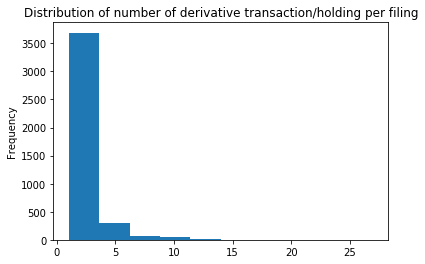

In [39]:
# Derivative transactions/holdings

uniqueAcc = dfDT.groupby(['accNum']) #group by accNum
sizes = uniqueAcc.size()

print('Statistics on the distribution of number of derivative transaction/holding per filing')
print(sizes.describe())
print('\n')

print('Filing with most derivative transaction/holding')
print(sizes.sort_values(ascending=False).head(5))
print('\n')

sizes.plot('hist', label=True, title="Distribution of number of derivative transaction/holding per filing")

possibleNumDT = set(sizes)
for size in possibleNumDT:
    print("Number of filing with " + str(size) + " derivative transaction/holdings: ", sizes[sizes==size].count())

print('\n')

Statistics on the distribution of number of derivative transaction/holding per Form 4
count    3954.000000
mean        1.846232
std         1.824206
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        27.000000
dtype: float64


Form 4 with most derivative transaction/holding
accNum
1689923/0001140361-17-013827    27
8063/0001209191-17-013293       20
8063/0001209191-17-013297       20
8063/0001209191-17-019295       19
1352618/0001628280-17-002333    19
dtype: int64


Number of Form 4 with 1 derivative transaction/holdings:  2625
Number of Form 4 with 2 derivative transaction/holdings:  622
Number of Form 4 with 3 derivative transaction/holdings:  285
Number of Form 4 with 4 derivative transaction/holdings:  150
Number of Form 4 with 5 derivative transaction/holdings:  69
Number of Form 4 with 6 derivative transaction/holdings:  77
Number of Form 4 with 7 derivative transaction/holdings:  41
Number of Form 4 with 8 derivative transaction/holdi

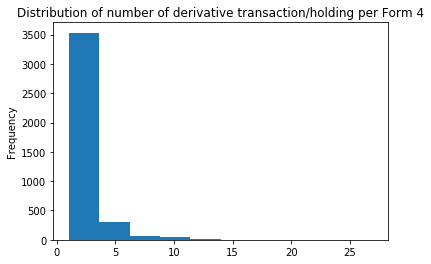

In [62]:
# Derivative transactions/holdings

unique4Acc = dfDT[dfDT['documentType'] == '4'].groupby(['accNum']) #group by accNum
sizes = unique4Acc.size()

print('Statistics on the distribution of number of derivative transaction/holding per Form 4')
print(sizes.describe())
print('\n')

print('Form 4 with most derivative transaction/holding')
print(sizes.sort_values(ascending=False).head(5))
print('\n')

sizes.plot('hist', label=True, title="Distribution of number of derivative transaction/holding per Form 4")

possibleNumDT = set(sizes)
for size in possibleNumDT:
    print("Number of Form 4 with " + str(size) + " derivative transaction/holdings: ", sizes[sizes==size].count())

print('\n')

Statistics on the distribution of number of derivative transaction/holding per Form 4/A
count    175.000000
mean       2.028571
std        3.104370
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       23.000000
dtype: float64


Form 4/A with most derivative transaction/holding
accNum
1559998/000149315217004386/0001493152-17-004386    23
1559998/000149315217004384/0001493152-17-004384    23
1559998/000149315217004383/0001493152-17-004383    22
1652044/000120919117003983/0001209191-17-003983    11
8328/000117911017015575/0001179110-17-015575        9
dtype: int64


Number of Form 4/A with 1 derivative transaction/holdings:  122
Number of Form 4/A with 2 derivative transaction/holdings:  24
Number of Form 4/A with 3 derivative transaction/holdings:  12
Number of Form 4/A with 4 derivative transaction/holdings:  6
Number of Form 4/A with 5 derivative transaction/holdings:  1
Number of Form 4/A with 6 derivative transaction/holdings:  3
Number of Form 4/

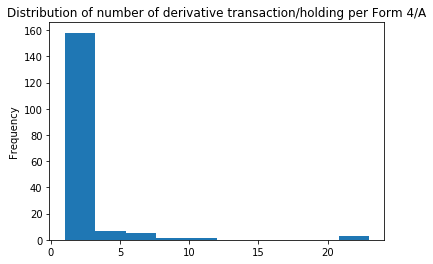

In [63]:
# Derivative transactions/holdings

unique4AAcc = dfDT[dfDT['documentType'] == '4/A'].groupby(['accNum']) #group by accNum
sizes = unique4AAcc.size()

print('Statistics on the distribution of number of derivative transaction/holding per Form 4/A')
print(sizes.describe())
print('\n')

print('Form 4/A with most derivative transaction/holding')
print(sizes.sort_values(ascending=False).head(5))
print('\n')

sizes.plot('hist', label=True, title="Distribution of number of derivative transaction/holding per Form 4/A")

possibleNumDT = set(sizes)
for size in possibleNumDT:
    print("Number of Form 4/A with " + str(size) + " derivative transaction/holdings: ", sizes[sizes==size].count())

print('\n')

Statistics on the distribution of number of nonderivative transaction/holding per Form 4
count    7399.000000
mean        2.389782
std         2.377688
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        30.000000
dtype: float64


Form 4 with most nonderivative transaction/holding
accNum
1304409/0001011034-17-000001    30
2098/0001026608-17-000011       30
66740/0001127602-17-006212      29
66740/0001127602-17-004925      29
66740/0001127602-17-004921      29
dtype: int64


Number of Form 4 with 1 nonderivative transaction/holdings:  3357
Number of Form 4 with 2 nonderivative transaction/holdings:  1862
Number of Form 4 with 3 nonderivative transaction/holdings:  903
Number of Form 4 with 4 nonderivative transaction/holdings:  532
Number of Form 4 with 5 nonderivative transaction/holdings:  240
Number of Form 4 with 6 nonderivative transaction/holdings:  139
Number of Form 4 with 7 nonderivative transaction/holdings:  105
Number of Form 4 with

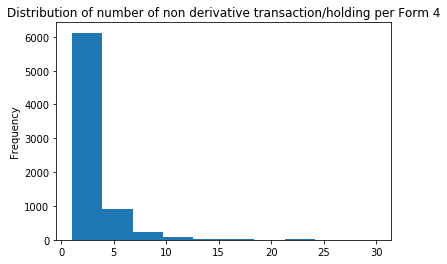

In [69]:
# Nonderivative transactions/holdings; form 4

unique4Acc = dfNDT[dfNDT['documentType'] == '4'].groupby(['accNum']) #group by accNum
sizes = unique4Acc.size()

print('Statistics on the distribution of number of nonderivative transaction/holding per Form 4')
print(sizes.describe())
print('\n')

print('Form 4 with most nonderivative transaction/holding')
print(sizes.sort_values(ascending=False).head(5))
print('\n')

sizes.plot('hist', label=True, title="Distribution of number of non derivative transaction/holding per Form 4")

possibleNumNDT = set(sizes)
for size in possibleNumNDT:
    print("Number of Form 4 with " + str(size) + " nonderivative transaction/holdings: ", sizes[sizes==size].count())

print('\n')

Statistics on the distribution of number of nonderivative transaction/holding per Form 4/A
count    338.000000
mean       2.053254
std        1.900368
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       18.000000
dtype: float64


Form 4/A with most nonderivative transaction/holding
accNum
66740/000112760217018755/0001127602-17-018755      18
1409539/000149322517000001/0001493225-17-000001    17
1652044/000120919117007350/0001209191-17-007350    12
1173479/000117347917000003/0001173479-17-000003     9
945617/000072174817000580/0000721748-17-000580      9
dtype: int64


Number of Form 4/A with 1 nonderivative transaction/holdings:  171
Number of Form 4/A with 2 nonderivative transaction/holdings:  95
Number of Form 4/A with 3 nonderivative transaction/holdings:  30
Number of Form 4/A with 4 nonderivative transaction/holdings:  19
Number of Form 4/A with 5 nonderivative transaction/holdings:  11
Number of Form 4/A with 6 nonderivative transaction/hold

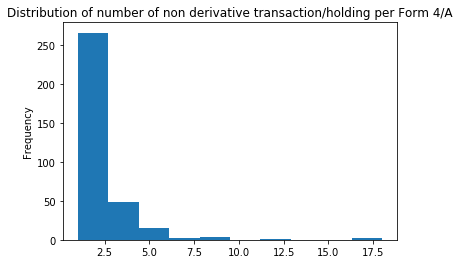

In [70]:
# Nonderivative transactions/holdings; form 4/A

unique4Acc = dfNDT[dfNDT['documentType'] == '4/A'].groupby(['accNum']) #group by accNum
sizes = unique4Acc.size()

print('Statistics on the distribution of number of nonderivative transaction/holding per Form 4/A')
print(sizes.describe())
print('\n')

print('Form 4/A with most nonderivative transaction/holding')
print(sizes.sort_values(ascending=False).head(5))
print('\n')

sizes.plot('hist', label=True, title="Distribution of number of non derivative transaction/holding per Form 4/A")

possibleNumNDT = set(sizes)
for size in possibleNumNDT:
    print("Number of Form 4/A with " + str(size) + " nonderivative transaction/holdings: ", sizes[sizes==size].count())

print('\n')

In [12]:
# Derivative transaction codes

uniqueAcc = dfDT.groupby(['transactionCode']) #group by accNum
sizes = uniqueAcc.size()
print('All derivative transactionCode distribution')
print(sizes.sort_values(ascending=False))
print('\n')

unique4AAcc = dfDT[dfDT['documentType'] == '4/A'].groupby(['transactionCode'])
sizes = unique4AAcc.size()
print('4/A derivative transactionCode distribution')
print(sizes.sort_values(ascending=False))
print('\n')

unique4Acc = dfDT[dfDT['documentType'] == '4'].groupby(['transactionCode']) 
sizes = unique4Acc.size()
print('4 derivative transactionCode distribution')
print(sizes.sort_values(ascending=False))
print('\n')

# Nonderivative transaction codes

uniqueAcc = dfNDT.groupby(['transactionCode']) #group by accNum
sizes = uniqueAcc.size()
print('All nonderivative transactionCode distribution')
print(sizes.sort_values(ascending=False))
print('\n')

unique4AAcc = dfNDT[dfNDT['documentType'] == '4/A'].groupby(['transactionCode'])
sizes = unique4AAcc.size()
print('4/A nonderivative transactionCode distribution')
print(sizes.sort_values(ascending=False))
print('\n')

unique4Acc = dfNDT[dfNDT['documentType'] == '4'].groupby(['transactionCode']) 
sizes = unique4Acc.size()
print('4 nonderivative transactionCode distribution')
print(sizes.sort_values(ascending=False))
print('\n')

All derivative transactionCode distribution
transactionCode
A    2676
M    2414
D     389
C     194
J     136
P      37
F      37
X      32
S      15
I       9
dtype: int64


4/A derivative transactionCode distribution
transactionCode
A    135
M     57
J     38
C     11
X      5
P      3
D      1
dtype: int64


4 derivative transactionCode distribution
transactionCode
A    2541
M    2357
D     388
C     183
J      98
F      37
P      34
X      27
S      15
I       9
dtype: int64


All nonderivative transactionCode distribution
transactionCode
S    3350
A    3277
F    2929
M    2261
P     827
D     509
J     465
G     277
C     149
I      25
U      24
X      21
L       8
W       4
dtype: int64


4/A nonderivative transactionCode distribution
transactionCode
A    156
S    129
F     92
P     57
M     46
J     28
G     12
X      5
C      5
D      4
I      1
dtype: int64


4 nonderivative transactionCode distribution
transactionCode
S    3221
A    3121
F    2837
M    2215
P     770
D     50

In [30]:
# Derivative overall more A, nonderivative overall more D
# 4/A in both have more A

# Derivative transactionAcquiredDisposedCode

print('All derivative transactionAcquiredDisposedCode')
print('A', sum(dfDT['transactionAcquiredDisposedCode'].str.contains('A')==True))
print('D', sum(dfDT['transactionAcquiredDisposedCode'].str.contains('D')==True))
print('\n')

df4aDT = dfDT[dfDT['documentType'] == '4/A']
print('4/A derivative transactionAcquiredDisposedCode')
print('A', sum(df4aDT['transactionAcquiredDisposedCode'].str.contains('A')==True))
print('D', sum(df4aDT['transactionAcquiredDisposedCode'].str.contains('D')==True))
print('\n')

df4DT = dfDT[dfDT['documentType'] == '4']
print('4 derivative transactionAcquiredDisposedCode')
print('A', sum(df4DT['transactionAcquiredDisposedCode'].str.contains('A')==True))
print('D', sum(df4DT['transactionAcquiredDisposedCode'].str.contains('D')==True))
print('\n')

# # Nonderivative transaction codes

print('All nonderivative transactionAcquiredDisposedCode')
print('A', sum(dfNDT['transactionAcquiredDisposedCode'].str.contains('A')==True))
print('D', sum(dfNDT['transactionAcquiredDisposedCode'].str.contains('D')==True))
print('\n')

ndf4aDT = dfNDT[dfNDT['documentType'] == '4/A']
print('4/A nonderivative transactionAcquiredDisposedCode')
print('A', sum(ndf4aDT['transactionAcquiredDisposedCode'].str.contains('A')==True))
print('D', sum(ndf4aDT['transactionAcquiredDisposedCode'].str.contains('D')==True))
print('\n')

ndf4DT = dfNDT[dfNDT['documentType'] == '4']
print('4 nonderivative transactionAcquiredDisposedCode')
print('A', sum(ndf4DT['transactionAcquiredDisposedCode'].str.contains('A')==True))
print('D', sum(ndf4DT['transactionAcquiredDisposedCode'].str.contains('D')==True))
print('\n')


All derivative transactionAcquiredDisposedCode
A 2908
D 3031


4/A derivative transactionAcquiredDisposedCode
A 165
D 85


4 derivative transactionAcquiredDisposedCode
A 2743
D 2946


All nonderivative transactionAcquiredDisposedCode
A 6877
D 7249


4/A nonderivative transactionAcquiredDisposedCode
A 285
D 250


4 nonderivative transactionAcquiredDisposedCode
A 6592
D 6999




In [41]:
"""
Derivative securityTitle -> lowercased & removed tags
"""
def removeTags(x):
    return re.sub("<.*?>", "", x)

uniqueAcc = dfDT.groupby(dfDT['securityTitle'].str.lower().apply(removeTags))
sizes = uniqueAcc.size()
print('All derivative securityTitle')
print(sizes.sort_values(ascending=False))
print('\n')

# Nonderivative securityTitle
uniqueAcc = dfNDT.groupby(dfNDT['securityTitle'].str.lower().apply(removeTags))
sizes = uniqueAcc.size()
print('All nonderivative securityTitle')
print(sizes.sort_values(ascending=False))
print('\n')

All derivative securityTitle
securityTitle
stock option (right to buy)                                  977
restricted stock units                                       911
employee stock option (right to buy)                         460
stock options                                                291
non-qualified stock option (right to buy)                    289
stock option                                                 288
restricted stock unit                                        266
option (right to buy)                                        195
option                                                       157
phantom stock units                                          144
options to acquire isca                                      104
employee stock option                                         87
option to purchase common stock                               87
stock options (right to buy)                                  84
restricted stock / units                       

In [42]:
# securityTitle form 4 vs 4a
uniqueAcc = dfDT[dfDT['documentType'] == '4'].groupby(dfDT['securityTitle'].str.lower().apply(removeTags))
sizes = uniqueAcc.size()
print('4 derivative securityTitle')
print(sizes.sort_values(ascending=False))
print('\n')

uniqueAcc = dfDT[dfDT['documentType'] == '4/A'].groupby(dfDT['securityTitle'].str.lower().apply(removeTags))
sizes = uniqueAcc.size()
print('4/A derivative securityTitle')
print(sizes.sort_values(ascending=False))
print('\n')

# Nonderivative securityTitle
uniqueAcc = dfNDT[dfNDT['documentType'] == '4'].groupby(dfNDT['securityTitle'].str.lower().apply(removeTags))
sizes = uniqueAcc.size()
print('4 nonderivative securityTitle')
print(sizes.sort_values(ascending=False))
print('\n')

uniqueAcc = dfNDT[dfNDT['documentType'] == '4/A'].groupby(dfNDT['securityTitle'].str.lower().apply(removeTags))
sizes = uniqueAcc.size()
print('4/A nonderivative securityTitle')
print(sizes.sort_values(ascending=False))
print('\n')

4 derivative securityTitle
securityTitle
stock option (right to buy)                       951
restricted stock units                            879
employee stock option (right to buy)              449
stock options                                     284
restricted stock unit                             264
stock option                                      256
non-qualified stock option (right to buy)         253
option (right to buy)                             192
option                                            155
phantom stock units                               144
options to acquire isca                           104
employee stock option                              87
restricted stock / units                           83
phantom stock                                      80
option to purchase common stock                    80
stock options (right to buy)                       73
stock units                                        73
class b common stock                     

4/A nonderivative securityTitle
securityTitle
common stock                                                   556
common shares                                                   17
class a common stock                                            14
class c capital stock                                           14
common stock, $.10 par value                                     7
common units                                                     6
common stock, $1.00 par value                                    6
common shares without par value                                  6
ordinary shares                                                  5
common stock, par value $.01 per share                           5
commonn stock                                                    4
acnb corporation common                                          4
ordinary shares, par value $0.0001                               3
common stock, $.01 par value                                     3
units rep. assig

In [44]:
# transactionformtype

# form 5 = annual statement of changes
# report 4 if holding changed

# ignore 5s for now

uniqueAcc = dfDT.groupby(dfDT['transactionFormType'])
sizes = uniqueAcc.size()
print('All derivative transactionFormType')
print(sizes.sort_values(ascending=False))
print('\n')

uniqueAcc = dfNDT.groupby(dfNDT['transactionFormType'])
sizes = uniqueAcc.size()
print('All nonderivative transactionFormType')
print(sizes.sort_values(ascending=False))
print('\n')


All derivative transactionFormType
transactionFormType
4    5915
5      24
dtype: int64


All nonderivative transactionFormType
transactionFormType
4    13834
5      292
dtype: int64




In [45]:
# equitySwapInvolved

uniqueAcc = dfDT.groupby(dfDT['equitySwapInvolved'])
sizes = uniqueAcc.size()
print('All derivative equitySwapInvolved')
print(sizes.sort_values(ascending=False))
print('\n')

uniqueAcc = dfNDT.groupby(dfNDT['equitySwapInvolved'])
sizes = uniqueAcc.size()
print('All nonderivative equitySwapInvolved')
print(sizes.sort_values(ascending=False))
print('\n')


All derivative equitySwapInvolved
equitySwapInvolved
0        5798
false     138
1           2
true        1
dtype: int64


All nonderivative equitySwapInvolved
equitySwapInvolved
0        13747
false      373
1            4
true         2
dtype: int64




In [48]:
# transactionTimeliness

uniqueAcc = dfNDT.groupby(dfNDT['transactionTimelines'])
sizes = uniqueAcc.size()
print('All nonderivative transactionTimelines')
print(sizes.sort_values(ascending=False))
print('\n')


All nonderivative transactionTimelines
transactionTimelines
0        13747
false      373
1            4
true         2
dtype: int64




In [21]:
grouped

,rptOwnerCik,rptOwnerFormType,rptOwnerBusinessPhone,periodOfReport,rptOwnerMailStreet1,issuerIrs,rptOwnerStateDescription,issuerBusinessCity,rptOwnerMailCity,issuerMailCity,...,documentType,rptOwnerName,rowNumber,rptOwnerState,notSubjectToSection16,changedDate,publicDocCount,rptOwnerFilmNum,rptOwnerMailZip,issuerBusinessState
accNum,,,,,,,,,,,,,,,,,,,,,
1001258/0001214659-17-001359,0001569227,4,None,2017-02-23,"10 EAST 53RD STREET, 31ST FLOOR",223388607,CAYMAN ISLANDS,ENGLEWOOD CLIFFS,NEW YORK,ENGLEWOOD CLIFFS,...,4,"Mangrove Partners Master Fund, Ltd.",1,E9,true,20170224,1,17638468,10022,NJ
1001258/0001437749-17-003445,0001605565,4,None,2017-02-23,210 SYLVAN AVENUE,223388607,,ENGLEWOOD CLIFFS,ENGELWOOD CLIFFS,ENGLEWOOD CLIFFS,...,4,STERN RICKY,1,NJ,None,20170228,1,17649683,07632,NJ
1001463/0001380389-17-000003,0001664787,4,None,2017-01-24,2810 PHILIPPE PARKWAY,752095676,,CLEARWATER,SAFETY HARBOR,CLEARWATER,...,4,Pertile Richard K,1,FL,0,20170126,1,17550653,34695,FL
1001463/0001380389-17-000004,0001664919,4,None,2017-01-24,1126 PIN OAK LANE,752095676,,CLEARWATER,BRENTWOOD,CLEARWATER,...,4,Roberts Gary Jack Jr,1,TN,0,20170126,1,17550769,37027,FL
1001463/0001380389-17-000017,0001664787,4,None,2017-03-14,2810 PHILIPPE PARKWAY,752095676,,CLEARWATER,SAFETY HARBOR,CLEARWATER,...,4,Pertile Richard K,1,FL,0,20170316,1,17694383,34695,FL
1001463/0001385150-17-000001,0001385150,4,None,2017-01-17,3512 E. SILVER SPRINGS BLVD - #243,752095676,,CLEARWATER,OCALA,CLEARWATER,...,4,Sample Steven L,1,FL,1,20170118,1,17533288,34470,FL
1002910/0001002910-17-000013,0001199579,4,None,2017-01-03,2775 SANDERS RD,431723446,,ST LOUIS,NORTHBROOK,ST LOUIS,...,4,BRUNE CATHERINE S,1,MO,None,20170105,1,17510939,60062-6127,MO
1002910/0001002910-17-000014,0001447555,4,None,2017-01-03,UNISYS CORPORATION,431723446,,ST LOUIS,BLUE BELL,ST LOUIS,...,4,COLEMAN J EDWARD,1,MO,None,20170105,1,17510957,19422,MO
1002910/0001002910-17-000015,0001203249,4,None,2017-01-03,CSX CORPORATION,431723446,,ST LOUIS,JACKSONVILLE,ST LOUIS,...,4,FITZSIMMONS ELLEN M,1,MO,None,20170105,1,17510969,32202,MO


In [23]:
df2[df2['accNum'] == '1001258/0001214659-17-001359'] 

,accNum,headId,rowNumber,documentType,publicDocCount,periodOfReport,filedDate,changedDate,schemaVersion,dateOfOriginalSubmission,...,rptOwnerStateDescription,rptOwnerMailStreet1,rptOwnerMailStreet2,rptOwnerMailCity,rptOwnerMailState,rptOwnerMailZip,rptOwnerisDirector,rptOwnerisOfficer,rptOwnerisTenPercentOwner,rptOwnerisOther
6500,1001258/0001214659-17-001359,1001258/0001214659-17-001359-1,1,4,1,2017-02-23,20170224,20170224,X0306,None,...,CAYMAN ISLANDS,"10 EAST 53RD STREET, 31ST FLOOR",None,NEW YORK,NY,10022,false,false,true,false
6501,1001258/0001214659-17-001359,1001258/0001214659-17-001359-2,2,4,1,2017-02-23,20170224,20170224,X0306,None,...,CAYMAN ISLANDS,"10 EAST 53RD STREET, 31ST FLOOR",None,NEW YORK,NY,10022,false,false,true,false
6502,1001258/0001214659-17-001359,1001258/0001214659-17-001359-3,3,4,1,2017-02-23,20170224,20170224,X0306,None,...,,10 EAST 53RD STREET,31ST FLOOR,NEW YORK,NY,10022,false,false,true,false
6503,1001258/0001214659-17-001359,1001258/0001214659-17-001359-4,4,4,1,2017-02-23,20170224,20170224,X0306,None,...,,"MAPLES CORP. SVCS, PO BOX 309","UGLAND HOUSE, S. CHURCH STREET",GEORGE TOWN,E9,KY1-1104,false,false,true,false
6504,1001258/0001214659-17-001359,1001258/0001214659-17-001359-5,5,4,1,2017-02-23,20170224,20170224,X0306,None,...,,"MAPLES CORP. SVCS, PO BOX 309","UGLAND HOUSE, S. CHURCH STREET",GEORGE TOWN,E9,KY1-1104,false,false,true,false
6505,1001258/0001214659-17-001359,1001258/0001214659-17-001359-6,6,4,1,2017-02-23,20170224,20170224,X0306,None,...,,"645 MADISON AVENUE, 14TH FLOOR","UGLAND HOUSE, S. CHURCH STREET",NEW YORK,NY,10022,false,false,true,false


accNum
1034196/0001209191-17-013596                       10
1432552/0001209191-17-022496                       10
1430922/0001209191-17-022496                       10
1430923/0001209191-17-013596                       10
1432552/0001209191-17-013596                       10
1430923/0001209191-17-020714                       10
1430923/0001209191-17-022496                       10
1704525/000110465917026605/0001104659-17-026605    10
1430925/0001209191-17-013596                       10
1667354/000110465917026605/0001104659-17-026605    10
1432552/0001209191-17-020714                       10
1192887/0000899243-17-005133                       10
1430925/0001209191-17-020714                       10
1192887/0000899243-17-003893                       10
1430925/0001209191-17-022496                       10
1430926/0001209191-17-013596                       10
1430926/0001209191-17-020714                       10
1430919/0001209191-17-013596                       10
1669792/0001209191-17